In [2]:
pip install xgboost

     ------------------------------------ 125.4/125.4 MB 575.3 kB/s eta 0:00:00



You should consider upgrading via the 'c:\users\rakesh\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [1]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\rakesh\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\rakesh\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install tensorflow

  Using cached tensorflow-2.11.0-cp37-cp37m-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp37-cp37m-win_amd64.whl (266.3 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp37-cp37m-win_amd64.whl (1.5 MB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)



You should consider upgrading via the 'c:\users\rakesh\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from keras.models import Sequential
#from tensorflow.keras.models import Sequential

from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
pip show keras

Name: kerasNote: you may need to restart the kernel to use updated packages.



Version: 2.11.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: c:\users\rakesh\appdata\local\programs\python\python37\lib\site-packages
Requires: 
Required-by: mtcnn, tensorflow-intel


In [58]:
dataset = pd.read_csv('Thalassemia1 (2).csv')

In [59]:
dataset.head()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate (rates/min,Gender,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Blood test result,Genetic Disorder,Disorder Subclass
0,Yes,No,Yes,No,4.760603,Normal(30-60),Normal,NaN,No,Yes,NaN,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,Yes,Yes,No,No,4.910669,Tachypnea,Normal,NaN,No,Yes,normal,NaN,Cystic fibrosis
2,Yes,No,No,No,4.893297,Normal(30-60),Tachycardia,NaN,Yes,Yes,normal,Multifactorial genetic inheritance disorders,Diabetes
3,Yes,No,Yes,No,4.705280,Tachypnea,Normal,Male,NaN,Yes,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,Yes,No,NaN,Yes,4.720703,Tachypnea,Tachycardia,Male,Yes,No,NaN,Multifactorial genetic inheritance disorders,Cancer


In [60]:
dataset.describe()

,Blood cell count (mcL)
count,21011.000000
mean,4.899004
std,0.199829
min,4.092727
25%,4.763230
50%,4.899548
75%,5.033977
max,5.609829


In [61]:
dataset['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     9686
Single-gene inheritance diseases                7291
Multifactorial genetic inheritance disorders    1985
Name: Genetic Disorder, dtype: int64

In [62]:
len(dataset['Genetic Disorder'].value_counts())

3

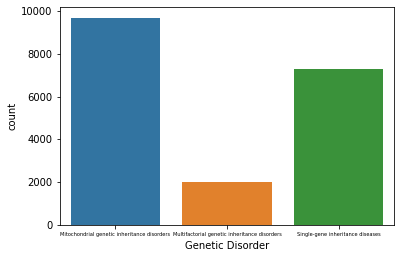

In [63]:
sns.countplot(x='Genetic Disorder',data=dataset)
plt.xticks(fontsize=5)
plt.show()

In [64]:
dataset['Disorder Subclass'].value_counts()

Leigh syndrome                         4893
Mitochondrial myopathy                 4202
Cystic fibrosis                        3277
Tay-Sachs                              2690
Diabetes                               1743
Hemochromatosis                        1291
Leber's hereditary optic neuropathy     607
Alzheimer's                             148
Cancer                                   92
Name: Disorder Subclass, dtype: int64

In [65]:
len(dataset['Disorder Subclass'].value_counts())

9

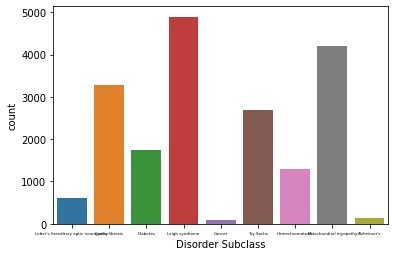

In [66]:
sns.countplot(x='Disorder Subclass',data=dataset)
plt.xticks(fontsize=4)
plt.show()

In [67]:
dataset['Blood test result'].value_counts()

slightly abnormal    4855
inconclusive         4725
normal               4721
abnormal             4676
Name: Blood test result, dtype: int64

In [68]:
len(dataset['Blood test result'].value_counts())

4

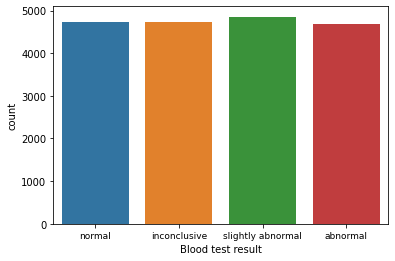

In [69]:
sns.countplot(x='Blood test result',data=dataset)
plt.xticks(fontsize=9)
plt.show()

In [70]:
dataset.shape

(21011, 13)

In [71]:
dataset.columns

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Blood cell count (mcL)',
       'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Gender',
       'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies', 'Blood test result',
       'Genetic Disorder', 'Disorder Subclass'],
      dtype='object')

In [72]:
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21006    False
21007    False
21008    False
21009    False
21010    False
Length: 21011, dtype: bool

In [73]:
dataset.duplicated().sum()

0

In [74]:
dataset.isna().sum()

Genes in mother's side                             0
Inherited from father                            287
Maternal gene                                   2694
Paternal gene                                      0
Blood cell count (mcL)                             0
Respiratory Rate (breaths/min)                  2059
Heart Rate (rates/min                           2025
Gender                                          2063
Assisted conception IVF/ART                     2004
History of anomalies in previous pregnancies    2066
Blood test result                               2034
Genetic Disorder                                2049
Disorder Subclass                               2068
dtype: int64

In [75]:
dataset['Inherited from father'].value_counts()

No     12508
Yes     8216
Name: Inherited from father, dtype: int64

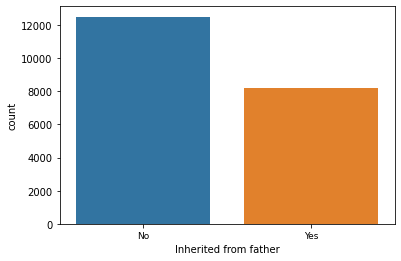

In [76]:
sns.countplot(x='Inherited from father',data=dataset)
plt.xticks(fontsize=9)
plt.show()

In [77]:
dataset['Inherited from father'].fillna('Yes', inplace=True)

In [78]:
dataset['Maternal gene'].value_counts()

Yes    10125
No      8192
Name: Maternal gene, dtype: int64

In [79]:
dataset['Respiratory Rate (breaths/min)'].value_counts()

Normal(30-60)    9595
Tachypnea        9357
Name: Respiratory Rate (breaths/min), dtype: int64

In [80]:
dataset['Maternal gene'].fillna('Yes', inplace=True)

In [81]:
dataset['Heart Rate (rates/min'].value_counts()

Normal         9715
Tachycardia    9271
Name: Heart Rate (rates/min, dtype: int64

In [82]:
dataset['Heart Rate (rates/min'].fillna('Tachycardia', inplace=True)

In [83]:
dataset['Gender'].value_counts()

Ambiguous    6385
Male         6321
Female       6242
Name: Gender, dtype: int64

In [84]:
dataset['Gender'].fillna('Male', inplace=True)

In [85]:
dataset['Assisted conception IVF/ART'].value_counts()

Yes    9555
No     9452
Name: Assisted conception IVF/ART, dtype: int64

In [86]:
dataset['Assisted conception IVF/ART'].fillna('Yes', inplace=True)

In [87]:
dataset['History of anomalies in previous pregnancies'].value_counts()

Yes    9605
No     9340
Name: History of anomalies in previous pregnancies, dtype: int64

In [88]:
dataset['History of anomalies in previous pregnancies'].fillna('Yes', inplace=True)

In [89]:
dataset.isna().sum()

Genes in mother's side                             0
Inherited from father                              0
Maternal gene                                      0
Paternal gene                                      0
Blood cell count (mcL)                             0
Respiratory Rate (breaths/min)                  2059
Heart Rate (rates/min                              0
Gender                                             0
Assisted conception IVF/ART                        0
History of anomalies in previous pregnancies       0
Blood test result                               2034
Genetic Disorder                                2049
Disorder Subclass                               2068
dtype: int64

In [90]:
dataset['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     9686
Single-gene inheritance diseases                7291
Multifactorial genetic inheritance disorders    1985
Name: Genetic Disorder, dtype: int64

In [91]:
dataset['Genetic Disorder'].fillna('Multifactorial genetic inheritance disorders', inplace=True)

In [92]:
dataset['Blood test result'].value_counts()

slightly abnormal    4855
inconclusive         4725
normal               4721
abnormal             4676
Name: Blood test result, dtype: int64

In [93]:
dataset['Blood test result'].fillna('slightly abnormal', inplace=True)

In [94]:
dataset['Disorder Subclass'].value_counts()

Leigh syndrome                         4893
Mitochondrial myopathy                 4202
Cystic fibrosis                        3277
Tay-Sachs                              2690
Diabetes                               1743
Hemochromatosis                        1291
Leber's hereditary optic neuropathy     607
Alzheimer's                             148
Cancer                                   92
Name: Disorder Subclass, dtype: int64

In [95]:
dataset['Disorder Subclass'].fillna('Hemochromatosis', inplace=True)

In [96]:
dataset['Disorder Subclass'].value_counts()

Leigh syndrome                         4893
Mitochondrial myopathy                 4202
Hemochromatosis                        3359
Cystic fibrosis                        3277
Tay-Sachs                              2690
Diabetes                               1743
Leber's hereditary optic neuropathy     607
Alzheimer's                             148
Cancer                                   92
Name: Disorder Subclass, dtype: int64

In [97]:
dataset.isna().sum()

Genes in mother's side                             0
Inherited from father                              0
Maternal gene                                      0
Paternal gene                                      0
Blood cell count (mcL)                             0
Respiratory Rate (breaths/min)                  2059
Heart Rate (rates/min                              0
Gender                                             0
Assisted conception IVF/ART                        0
History of anomalies in previous pregnancies       0
Blood test result                                  0
Genetic Disorder                                   0
Disorder Subclass                                  0
dtype: int64

In [98]:
dataset['Respiratory Rate (breaths/min)'].value_counts()

Normal(30-60)    9595
Tachypnea        9357
Name: Respiratory Rate (breaths/min), dtype: int64

In [99]:
dataset['Respiratory Rate (breaths/min)'].fillna('Tachypnea', inplace=True)

In [100]:
dataset.isna().sum()

Genes in mother's side                          0
Inherited from father                           0
Maternal gene                                   0
Paternal gene                                   0
Blood cell count (mcL)                          0
Respiratory Rate (breaths/min)                  0
Heart Rate (rates/min                           0
Gender                                          0
Assisted conception IVF/ART                     0
History of anomalies in previous pregnancies    0
Blood test result                               0
Genetic Disorder                                0
Disorder Subclass                               0
dtype: int64

In [101]:
dataset['Blood test result'].value_counts()

slightly abnormal    6889
inconclusive         4725
normal               4721
abnormal             4676
Name: Blood test result, dtype: int64

In [102]:
features_to_encode = ['Genes in mother\'s side', 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Blood cell count (mcL)', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Gender', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies']
target_columns = ['Blood test result','Genetic Disorder', 'Disorder Subclass']

In [103]:
label_encoders = {}
for feature in features_to_encode:
    if dataset[feature].dtype == 'object':
        le = LabelEncoder()
        dataset[feature] = le.fit_transform(dataset[feature])
        label_encoders[feature] = le

for target_column in target_columns:
    if dataset[target_column].dtype == 'object':
        le_target = LabelEncoder()
        dataset[target_column] = le_target.fit_transform(dataset[target_column])
        label_encoders[target_column] = le_target

In [104]:
X = dataset[features_to_encode]
Y = dataset[target_columns]

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [106]:
dataset

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate (rates/min,Gender,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Blood test result,Genetic Disorder,Disorder Subclass
0,1,0,1,0,4.760603,0,0,2,0,1,3,0,5
1,1,1,0,0,4.910669,1,0,2,0,1,2,1,2
2,1,0,0,0,4.893297,0,1,2,1,1,2,1,3
3,1,0,1,0,4.705280,1,0,2,1,1,1,0,6
4,1,0,1,1,4.720703,1,1,2,1,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21006,0,1,1,0,5.090495,1,1,2,0,1,2,2,8
21007,0,0,0,1,5.214750,1,1,2,1,1,3,0,6
21008,1,0,1,1,5.084831,0,1,0,0,0,3,1,4
21009,1,0,0,1,5.224828,1,1,0,1,1,1,0,7


In [53]:
#base_classifier = RandomForestClassifier(random_state=42)

In [54]:
#chain_classifier = ClassifierChain(base_classifier)

In [55]:
#X_train

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate (rates/min,Gender,Assisted conception IVF/ART,History of anomalies in previous pregnancies
6850,1,0,0,0,4.866244,0,0,0,0,1
13178,1,1,1,1,4.924996,1,0,1,1,1
12477,1,0,1,0,4.966461,0,0,2,1,1
13383,0,1,1,0,4.829579,0,1,2,0,0
109,1,1,1,0,4.676882,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
919,1,1,1,1,4.869457,1,1,1,0,0
20691,1,1,1,0,4.899190,0,0,0,0,1
5699,1,0,1,1,4.727235,0,1,1,0,1
10742,0,0,1,0,5.056732,0,1,2,0,0


In [55]:
#chain_classifier.fit(X_train, Y_train)

ClassifierChain(base_estimator=RandomForestClassifier(random_state=42))

In [56]:
#Y_pred = chain_classifier.predict(X_test)

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import ClassifierChain

# Create a Decision Tree classifier instance
base_classifier = DecisionTreeClassifier(random_state=42)

# Initialize a ClassifierChain with the Decision Tree classifier
chain_classifier = ClassifierChain(base_classifier)

# Fit the ClassifierChain on the training data
chain_classifier.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = chain_classifier.predict(X_test)

In [108]:
accuracies = [accuracy_score(Y_test[col], Y_pred[:, i]) for i, col in enumerate(target_columns)]

# Calculate the average accuracy
average_accuracy = sum(accuracies) / len(accuracies)

print("Accuracy for each target column:", accuracies)
print("Average Accuracy:", average_accuracy)

Accuracy for each target column: [0.2522208121827411, 0.37008248730964466, 0.1797271573604061]
Average Accuracy: 0.2673434856175973


In [109]:
X_test.iloc[0]
print("Actual prediction:",Y_test.iloc[0])

Actual prediction: Blood test result    3
Genetic Disorder     2
Disorder Subclass    8
Name: 10485, dtype: int32


In [59]:
dataset['Blood test result'].value_counts()

3    6889
1    4725
2    4721
0    4676
Name: Blood test result, dtype: int64

In [60]:
dataset['Genetic Disorder'].value_counts()

0    9686
2    7291
1    4034
Name: Genetic Disorder, dtype: int64

In [61]:
dataset['Disorder Subclass'].value_counts()

6    4893
7    4202
4    3359
2    3277
8    2690
3    1743
5     607
0     148
1      92
Name: Disorder Subclass, dtype: int64

In [62]:
ex1 = X_test.iloc[0]

In [63]:
chain_classifier.predict([ex1])

array([[0., 0., 7.]])

In [64]:
dataset['Respiratory Rate (breaths/min)'].value_counts()

1    11416
0     9595
Name: Respiratory Rate (breaths/min), dtype: int64

In [65]:
def decode_labels(encoded_data, label_encoders):
    decoded_data = encoded_data.copy()
    for feature, le in label_encoders.items():
        decoded_data[feature] = le.inverse_transform(encoded_data[feature])
    return decoded_data
# Decoding features and target columns
decoded_data = decode_labels(dataset, label_encoders)

# Separating decoded features and target columns
decoded_features = decoded_data[features_to_encode]
decoded_target = decoded_data[target_columns]


In [66]:
X_new = np.array([
    [0, 0, 1, 1, 4.9, 0, 0, 0, 0, 0]
    # Add more input vectors here
])
predictions = chain_classifier.predict(X_new)
print(predictions)

[[1. 0. 7.]]


In [110]:
X_new = np.array([
    [1, 0, 0, 1, 5.1, 1, 0, 1, 1, 0]
    # Add more input vectors here
])
predictions = chain_classifier.predict(X_new)
print(predictions)

[[2. 1. 4.]]


In [68]:
X_new = np.array([
    [1, 1, 0, 1, 4.6, 1, 0, 0, 1, 1]
    # Add more input vectors here
])
predictions = chain_classifier.predict(X_new)
print(predictions)

pred = predictions.flatten()
pred = pred.astype(int)
print(pred)
Blood_test_result=pred[0]
Genetic_Disorder=pred[1]
Disorder_Subclass=pred[2]
if(Blood_test_result == 0):
  print("abnormal")
elif(Blood_test_result == 1):
  print("inconclusive")
elif(Blood_test_result == 2):
  print("normal")
elif(Blood_test_result == 3):
  print("slightly abnormal")

##
if(Genetic_Disorder == 0):
  print("Mitochondrial genetic inheritence disorders")
elif(Genetic_Disorder == 1):
  print("Multifactorial genetic inheritence disorders")
elif(Genetic_Disorder == 2):
  print("Single-gene inheritence diseases")
##

if(Disorder_Subclass == 0):
  print("Alzeheimer's")
elif(Disorder_Subclass == 1):
  print("Cancer")
elif(Disorder_Subclass == 2):
  print("Cystic fibrosis")
elif(Disorder_Subclass == 3):
  print("Diabetes")
elif(Disorder_Subclass == 4):
  print("Hemochromatis")
elif(Disorder_Subclass == 5):
  print("Lebers hereditary optic neuropathy")
elif(Disorder_Subclass == 6):
  print("Leigh syndrome")
elif(Disorder_Subclass == 7):
  print("Mitochondrial myopathy")
elif(Disorder_Subclass == 8):
  print("Tay-Sachs")

[[2. 1. 3.]]
[2 1 3]
normal
Multifactorial genetic inheritence disorders
Diabetes


In [69]:
X_new = np.array([
    [1, 0, 0, 1, 5.1, 1, 0, 1, 1, 0]
    # Add more input vectors here
])
predictions = chain_classifier.predict(X_new)
print(predictions)

pred = predictions.flatten()
pred = pred.astype(int)
print(pred)

Blood_test_result=["abnormal","inconclusive","normal","slightly abnormal"]
Genetic_Disorder=["Mitochondrial genetic inheritence disorders","Multifactorial genetic inheritence disorders","Single-gene inheritence diseases"]
Disorder_Subclass=["Alzeheimer's","Cancer","Cystic fibrosis","Diabetes","Hemochromatis","Lebers hereditary optic neuropathy","Leigh syndrome","Mitochondrial myopathy","Tay-Sachs"]

print(Blood_test_result[pred[0]])
print(Genetic_Disorder[pred[1]])
print(Disorder_Subclass[pred[2]])

[[0. 0. 4.]]
[0 0 4]
abnormal
Mitochondrial genetic inheritence disorders
Hemochromatis


In [70]:
dataset['Blood test result'].value_counts()

3    6889
1    4725
2    4721
0    4676
Name: Blood test result, dtype: int64

In [71]:
for i in range(len(dataset['Blood test result'])):
  if(dataset['Blood test result'][i] == 0):
     print("abnormal")
  elif(dataset['Blood test result'][i] == 1):
     print("inconclusive")
  elif(dataset['Blood test result'][i] == 2):
     print("normal")
  elif(dataset['Blood test result'][i] == 3):
     print("slightly abnormal")

slightly abnormal
normal
normal
inconclusive
slightly abnormal
normal
normal
inconclusive
slightly abnormal
abnormal
abnormal
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
normal
normal
inconclusive
abnormal
normal
slightly abnormal
slightly abnormal
inconclusive
abnormal
abnormal
slightly abnormal
normal
normal
abnormal
slightly abnormal
abnormal
slightly abnormal
inconclusive
slightly abnormal
abnormal
abnormal
normal
slightly abnormal
normal
slightly abnormal
inconclusive
slightly abnormal
abnormal
inconclusive
abnormal
inconclusive
normal
abnormal
inconclusive
normal
abnormal
inconclusive
slightly abnormal
normal
slightly abnormal
abnormal
abnormal
normal
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
normal
slightly abnormal
abnormal
normal
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
inconclusive
abnormal
abnormal
inconclusive
abnormal
abnormal
inconclusive
sl

normal
inconclusive
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
abnormal
abnormal
abnormal
abnormal
abnormal
slightly abnormal
inconclusive
abnormal
abnormal
abnormal
inconclusive
abnormal
normal
normal
inconclusive
normal
slightly abnormal
inconclusive
slightly abnormal
inconclusive
inconclusive
inconclusive
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
normal
normal
normal
inconclusive
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
inconclusive
normal
abnormal
inconclusive
abnormal
slightly abnormal
normal
normal
inconclusive
inconclusive
slightly abnormal
slightly abnormal
inconclusive
slightly abnormal
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
abnormal
abnormal
slightly abnormal
inconclusive
slightly abnormal
inconclusive
normal
slightly abnormal
normal
inconclusive
abnormal
normal
normal
normal
abnormal
inconclusive
abnormal
slightly abnormal
normal
slightly abnormal
inconclusive
abnormal
nor

abnormal
slightly abnormal
normal
slightly abnormal
normal
abnormal
slightly abnormal
inconclusive
inconclusive
slightly abnormal
inconclusive
normal
abnormal
abnormal
inconclusive
abnormal
abnormal
normal
slightly abnormal
normal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
abnormal
slightly abnormal
inconclusive
slightly abnormal
abnormal
slightly abnormal
abnormal
normal
inconclusive
normal
slightly abnormal
slightly abnormal
abnormal
inconclusive
normal
inconclusive
inconclusive
normal
slightly abnormal
abnormal
inconclusive
normal
normal
normal
slightly abnormal
abnormal
inconclusive
inconclusive
inconclusive
slightly abnormal
normal
slightly abnormal
abnormal
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
normal
inconclusive
abnormal
normal
slightly abnormal
normal
slightly abnormal
abnormal
slightly abnormal
abnormal
slightly abnormal
slightly abnormal
inconclusive
slightly abnorm

normal
inconclusive
slightly abnormal
slightly abnormal
normal
normal
inconclusive
inconclusive
slightly abnormal
normal
abnormal
normal
normal
slightly abnormal
abnormal
normal
normal
normal
slightly abnormal
inconclusive
inconclusive
normal
slightly abnormal
inconclusive
inconclusive
abnormal
inconclusive
inconclusive
slightly abnormal
slightly abnormal
inconclusive
normal
abnormal
slightly abnormal
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
normal
slightly abnormal
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
normal
normal
abnormal
slightly abnormal
slightly abnormal
inconclusive
inconclusive
abnormal
slightly abnormal
slightly abnormal
normal
abnormal
slightly abnormal
slightly abnormal
abnormal
normal
inconclusive
inconclusive
slightly abnormal
normal
normal
inconclusive
inconclusive
slightly abnormal
normal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
abnormal
inconclusive
abnormal
normal
incon

normal
normal
slightly abnormal
slightly abnormal
inconclusive
normal
abnormal
abnormal
abnormal
normal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
slightly abnormal
abnormal
abnormal
abnormal
normal
abnormal
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
normal
inconclusive
normal
slightly abnormal
abnormal
normal
abnormal
abnormal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
normal
slightly abnormal
abnormal
slightly abnormal
inconclusive
inconclusive
inconclusive
abnormal
slightly abnormal
slightly abnormal
abnormal
normal
normal
normal
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
abnormal
slightly abnormal
abnormal
slightly abnormal
normal
normal
normal
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
abnormal
inconclusive
norm

slightly abnormal
inconclusive
normal
inconclusive
normal
abnormal
abnormal
normal
normal
inconclusive
slightly abnormal
abnormal
abnormal
normal
inconclusive
inconclusive
slightly abnormal
slightly abnormal
inconclusive
abnormal
slightly abnormal
inconclusive
abnormal
inconclusive
abnormal
inconclusive
inconclusive
abnormal
abnormal
normal
normal
inconclusive
slightly abnormal
abnormal
slightly abnormal
normal
normal
slightly abnormal
inconclusive
abnormal
inconclusive
inconclusive
normal
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
abnormal
inconclusive
inconclusive
normal
abnormal
normal
slightly abnormal
abnormal
slightly abnormal
slightly abnormal
inconclusive
abnormal
abnormal
normal
slightly abnormal
slightly abnormal
normal
inconclusive
abnormal
abnormal
normal
inconclusive
slightly abnormal
inconclusive
normal
inconclusive
normal
inconclusive
inconclusive
slightly abnormal
normal

slightly abnormal
slightly abnormal
abnormal
normal
slightly abnormal
abnormal
slightly abnormal
inconclusive
normal
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
inconclusive
slightly abnormal
inconclusive
abnormal
inconclusive
inconclusive
slightly abnormal
inconclusive
slightly abnormal
normal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
normal
slightly abnormal
slightly abnormal
abnormal
normal
slightly abnormal
slightly abnormal
inconclusive
abnormal
abnormal
slightly abnormal
inconclusive
inconclusive
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
normal
normal
normal
slightly abnormal
normal
slightly abnormal
inconclusive
abnormal
inconclusive
inconclusive
normal
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
normal
slightly abnormal
slightly abnormal
normal
slightly abnormal
slightly abnormal
abnormal
normal
inconclusive
normal
incon

normal
normal
normal
inconclusive
inconclusive
inconclusive
slightly abnormal
slightly abnormal
abnormal
abnormal
normal
normal
normal
inconclusive
normal
inconclusive
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
normal
slightly abnormal
abnormal
normal
normal
abnormal
inconclusive
normal
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
normal
inconclusive
normal
inconclusive
inconclusive
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
slightly abnormal
normal
normal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
normal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
abnormal
slightly abnormal
slightly abnormal
normal
inconclusive
normal
normal
slightly abnormal
slightly abnormal
abnormal
abnormal
inconclusive
abnormal
abnormal
slightly abnormal
abnormal
abnormal
inconclusive
abnormal
abnormal
inconclusive
slightly abnorma

abnormal
abnormal
slightly abnormal
inconclusive
inconclusive
normal
normal
inconclusive
inconclusive
normal
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
normal
inconclusive
inconclusive
abnormal
normal
abnormal
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
normal
inconclusive
slightly abnormal
normal
normal
slightly abnormal
inconclusive
abnormal
normal
inconclusive
inconclusive
inconclusive
normal
inconclusive
slightly abnormal
normal
abnormal
normal
slightly abnormal
inconclusive
abnormal
abnormal
abnormal
slightly abnormal
abnormal
abnormal
slightly abnormal
slightly abnormal
inconclusive
normal
normal
inconclusive
abnormal
abnormal
slightly abnormal
slightly abnormal
normal
slightly abnormal
normal
slightly abnormal
abnormal
abnormal
inconclusive
normal
slightly abnormal
slightly abnormal
slightly abnormal
normal
abnormal
slightly abnormal
slightly abnormal
inconclusive
abnormal
inconclusi

inconclusive
abnormal
slightly abnormal
slightly abnormal
normal
abnormal
normal
normal
normal
inconclusive
inconclusive
normal
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
normal
slightly abnormal
slightly abnormal
inconclusive
inconclusive
slightly abnormal
abnormal
slightly abnormal
normal
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
normal
abnormal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
normal
normal
inconclusive
slightly abnormal
abnormal
abnormal
normal
inconclusive
inconclusive
abnormal
slightly abnormal
normal
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
abnormal
normal
inconclusive
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
slightly abnormal
normal
slightly abnormal
slightly abnormal
abnormal
inconclusive
slightly abnormal
normal
slightly abnormal
inconclusive
normal
slightly abnormal
normal
normal
inconclusive
inconclusive
slightly abnor

abnormal
abnormal
slightly abnormal
normal
inconclusive
inconclusive
inconclusive
slightly abnormal
abnormal
inconclusive
abnormal
inconclusive
slightly abnormal
abnormal
slightly abnormal
abnormal
normal
slightly abnormal
normal
slightly abnormal
inconclusive
slightly abnormal
normal
inconclusive
slightly abnormal
slightly abnormal
inconclusive
inconclusive
normal
slightly abnormal
inconclusive
slightly abnormal
normal
abnormal
normal
normal
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
normal
inconclusive
slightly abnormal
normal
slightly abnormal
abnormal
abnormal
slightly abnormal
inconclusive
inconclusive
inconclusive
normal
inconclusive
slightly abnormal
slightly abnormal
normal
slightly abnormal
slightly abnormal
inconclusive
normal
normal
slightly abnormal
abnormal
slightly abnormal
abnormal
normal
normal
abnormal
normal
slightly abnormal
slightly abnormal
normal
inconclusive
slightly abnormal
normal
abnormal
abnormal
inconclusive
normal
abnormal
i

slightly abnormal
abnormal
slightly abnormal
abnormal
normal
slightly abnormal
normal
abnormal
normal
normal
normal
abnormal
inconclusive
normal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
abnormal
inconclusive
abnormal
abnormal
abnormal
abnormal
abnormal
normal
normal
inconclusive
normal
abnormal
normal
inconclusive
slightly abnormal
inconclusive
normal
slightly abnormal
slightly abnormal
abnormal
inconclusive
slightly abnormal
inconclusive
normal
inconclusive
inconclusive
slightly abnormal
abnormal
inconclusive
slightly abnormal
normal
slightly abnormal
normal
slightly abnormal
normal
normal
normal
inconclusive
abnormal
normal
abnormal
abnormal
normal
abnormal
normal
slightly abnormal
normal
normal
normal
inconclusive
abnormal
normal
inconclusive
normal
normal
normal
slightly abnormal
inconclusive
slightly abnormal
inconclusive
abnormal
normal
slightly abnormal
slightly abnormal
inconclusive
inconclusive
slightly abnormal
abnormal
inconclusive
slightly abnormal
abn

inconclusive
slightly abnormal
abnormal
inconclusive
abnormal
normal
slightly abnormal
abnormal
abnormal
abnormal
normal
abnormal
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
normal
slightly abnormal
normal
normal
slightly abnormal
slightly abnormal
normal
normal
normal
abnormal
abnormal
normal
slightly abnormal
slightly abnormal
normal
abnormal
abnormal
inconclusive
inconclusive
normal
inconclusive
abnormal
inconclusive
slightly abnormal
abnormal
inconclusive
abnormal
inconclusive
slightly abnormal
inconclusive
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
normal
slightly abnormal
abnormal
slightly abnormal
normal
inconclusive
inconclusive
normal
slightly abnormal
slightly abnormal
slightly abnormal
normal
abnormal
abnormal
slightly abnormal
slightly abnormal
normal
slightly abnormal
normal
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
normal
slightly abnormal
inconclusive
abnormal
normal
slight

slightly abnormal
normal
normal
slightly abnormal
abnormal
abnormal
normal
slightly abnormal
inconclusive
inconclusive
inconclusive
inconclusive
normal
abnormal
normal
slightly abnormal
abnormal
abnormal
inconclusive
inconclusive
slightly abnormal
slightly abnormal
abnormal
normal
normal
normal
abnormal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
normal
abnormal
normal
slightly abnormal
abnormal
slightly abnormal
abnormal
normal
slightly abnormal
slightly abnormal
slightly abnormal
normal
abnormal
slightly abnormal
abnormal
abnormal
normal
slightly abnormal
abnormal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
abnormal
normal
slightly abnormal
abnormal
inconclusive
abnormal
inconclusive
slightly abnormal
slightly abnormal
normal
normal
slightly abnormal
inconclusive
inconclusive
normal
inconclusive
inconclusive
normal
normal
slightly abnormal
inconclusive
abnormal
abnormal
slightly abnormal
inconclusive
slightly abnorma

inconclusive
slightly abnormal
normal
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
abnormal
abnormal
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
inconclusive
abnormal
normal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
inconclusive
slightly abnormal
slightly abnormal
normal
inconclusive
inconclusive
normal
slightly abnormal
abnormal
slightly abnormal
slightly abnormal
inconclusive
normal
abnormal
normal
slightly abnormal
slightly abnormal
inconclusive
abnormal
abnormal
abnormal
abnormal
inconclusive
inconclusive
abnormal
inconclusive
slightly abnormal
normal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
normal
abnormal
slightly abnormal
inconclusive
abnormal
abnormal
inconclusive
abnormal
abnormal
normal
normal
normal
abnormal
slightly abnormal
abnormal
abnormal
abnormal
slightly abnormal
normal
slightly abnormal
abnormal
inconclusive
abnormal
normal
inconclusive
nor

slightly abnormal
inconclusive
abnormal
inconclusive
abnormal
slightly abnormal
normal
slightly abnormal
slightly abnormal
inconclusive
slightly abnormal
inconclusive
inconclusive
slightly abnormal
slightly abnormal
normal
inconclusive
slightly abnormal
slightly abnormal
normal
normal
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
inconclusive
normal
slightly abnormal
normal
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
normal
inconclusive
normal
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
normal
abnormal
abnormal
slightly abnormal
slightly abnormal
normal
abnormal
normal
normal
slightly abnormal
inconclusive
normal
abnormal
abnormal
abnormal
inconclusive
normal
normal
abnormal
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
normal
abnormal
normal
slightly abnormal
slightly abnormal
normal
abnormal
abnormal
abnormal
normal
slightly abnor

inconclusive
inconclusive
slightly abnormal
inconclusive
inconclusive
inconclusive
inconclusive
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
inconclusive
normal
slightly abnormal
inconclusive
inconclusive
inconclusive
normal
slightly abnormal
slightly abnormal
abnormal
inconclusive
slightly abnormal
normal
slightly abnormal
slightly abnormal
inconclusive
normal
inconclusive
slightly abnormal
inconclusive
normal
inconclusive
slightly abnormal
abnormal
inconclusive
normal
slightly abnormal
slightly abnormal
normal
normal
inconclusive
normal
slightly abnormal
normal
abnormal
abnormal
abnormal
abnormal
abnormal
inconclusive
normal
abnormal
slightly abnormal
abnormal
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
normal
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
abnormal
slightly abnormal
inconclusive
slightly abnormal
abnormal
inconclusive
slightly abnormal
inconclusive
abnormal
inconclusi

slightly abnormal
slightly abnormal
normal
normal
normal
slightly abnormal
slightly abnormal
normal
slightly abnormal
normal
abnormal
normal
slightly abnormal
normal
normal
slightly abnormal
normal
abnormal
slightly abnormal
inconclusive
normal
normal
slightly abnormal
inconclusive
slightly abnormal
abnormal
slightly abnormal
normal
slightly abnormal
slightly abnormal
inconclusive
abnormal
slightly abnormal
slightly abnormal
abnormal
normal
slightly abnormal
normal
normal
normal
abnormal
normal
abnormal
inconclusive
normal
inconclusive
inconclusive
inconclusive
abnormal
slightly abnormal
slightly abnormal
inconclusive
slightly abnormal
abnormal
slightly abnormal
normal
normal
normal
abnormal
normal
slightly abnormal
slightly abnormal
normal
normal
slightly abnormal
slightly abnormal
normal
slightly abnormal
normal
slightly abnormal
normal
normal
normal
inconclusive
abnormal
slightly abnormal
inconclusive
slightly abnormal
abnormal
slightly abnormal
inconclusive
normal
slightly abnormal

abnormal
inconclusive
abnormal
inconclusive
slightly abnormal
slightly abnormal
inconclusive
abnormal
slightly abnormal
abnormal
normal
slightly abnormal
normal
slightly abnormal
abnormal
slightly abnormal
slightly abnormal
abnormal
inconclusive
abnormal
normal
abnormal
normal
normal
abnormal
normal
slightly abnormal
normal
inconclusive
inconclusive
slightly abnormal
slightly abnormal
abnormal
inconclusive
slightly abnormal
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
normal
inconclusive
abnormal
slightly abnormal
abnormal
abnormal
abnormal
abnormal
normal
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
normal
inconclusive
abnormal
slightly abnormal
slightly abnormal
abnormal
inconclusive
slightly abnormal
slightly abnormal
inconclusive
inconclusive
abnormal
inconclusive
slightly abnormal
normal
normal
inconclusive
normal
slightly abnormal
slightly abno

normal
inconclusive
abnormal
inconclusive
inconclusive
abnormal
abnormal
inconclusive
slightly abnormal
normal
slightly abnormal
inconclusive
inconclusive
inconclusive
abnormal
inconclusive
normal
normal
inconclusive
abnormal
slightly abnormal
normal
normal
slightly abnormal
slightly abnormal
slightly abnormal
normal
inconclusive
abnormal
inconclusive
slightly abnormal
abnormal
inconclusive
abnormal
normal
normal
slightly abnormal
abnormal
inconclusive
normal
slightly abnormal
slightly abnormal
normal
slightly abnormal
normal
normal
slightly abnormal
inconclusive
normal
slightly abnormal
abnormal
inconclusive
normal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
inconclusive
abnormal
normal
normal
slightly abnormal
slightly abnormal
abnormal
slightly abnormal
abnormal
slightly abnormal
normal
slightly abnormal
slightly abnormal
slightly abnormal
abnormal
inconclusive
inconclusive
slightly abnormal
slightly abnormal
inconclusive
slightly abnormal
slightly abnormal
slight

normal
inconclusive
normal
normal
abnormal
slightly abnormal
inconclusive
inconclusive
abnormal
normal
slightly abnormal
normal
abnormal
inconclusive
inconclusive
normal
normal
slightly abnormal
inconclusive
inconclusive
normal
inconclusive
slightly abnormal
slightly abnormal
normal
normal
inconclusive
inconclusive
normal
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
slightly abnormal
abnormal
slightly abnormal
inconclusive
inconclusive
slightly abnormal
slightly abnormal
inconclusive
inconclusive
inconclusive
normal
slightly abnormal
abnormal
normal
abnormal
slightly abnormal
abnormal
abnormal
inconclusive
slightly abnormal
normal
inconclusive
inconclusive
normal
inconclusive
abnormal
inconclusive
slightly abnormal
slightly abnormal
slightly abnormal
inconclusive
slightly abnormal
normal
inconclusive
abnormal
slightly abnormal
slightly abnormal
slightly abnormal
slightly abnormal
normal
inconclusive
slightly abnormal
slightly abnormal
inconclusive
inconclusive
sli

In [72]:
X_new = np.array([
    [0, 0, 1, 1, 4.9, 0, 0, 0, 0, 0]
    # Add more input vectors here
])
predictions = chain_classifier.predict(X_new)
print(predictions)

pred = predictions.flatten()
pred = pred.astype(int)
print(pred)

Blood_test_result=["abnormal","inconclusive","normal","slightly abnormal"]
Genetic_Disorder=["Mitochondrial genetic inheritence disorders","Multifactorial genetic inheritence disorders","Single-gene inheritence diseases"]
Disorder_Subclass=["Alzeheimer's","Cancer","Cystic fibrosis","Diabetes","Hemochromatis","Lebers hereditary optic neuropathy","Leigh syndrome","Mitochondrial myopathy","Tay-Sachs"]

print(Blood_test_result[pred[0]])
print(Genetic_Disorder[pred[1]])
print(Disorder_Subclass[pred[2]])

[[1. 0. 7.]]
[1 0 7]
inconclusive
Mitochondrial genetic inheritence disorders
Mitochondrial myopathy


In [74]:
from joblib import dump
dump(chain_classifier, './../savedModels/chain_classifier.joblib')

['./../savedModels/chain_classifier.joblib']